In [12]:
import pandas as pd

penguins = pd.read_csv("penguins_classification.csv")
culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"

In [13]:
from sklearn.model_selection import train_test_split

data, target = penguins[culmen_columns], penguins[target_column]
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [14]:
from sklearn.linear_model import LogisticRegression

linear_model = LogisticRegression()
linear_model.fit(X_train, y_train)

LogisticRegression()

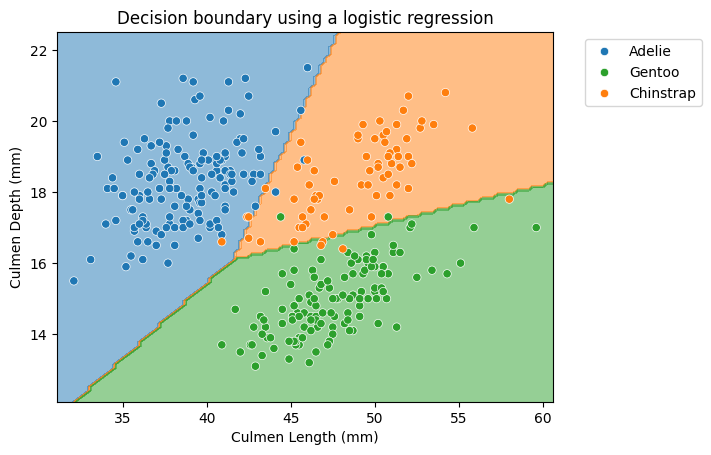

In [15]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.inspection import DecisionBoundaryDisplay

tab10_norm = mpl.colors.Normalize(vmin=-0.5, vmax=8.5)
palette = ["tab:blue", "tab:green", "tab:orange"]

dbd = DecisionBoundaryDisplay.from_estimator(
    linear_model,
    X_train, 
    response_method="predict",
    cmap="tab10",
    norm=tab10_norm,
    alpha=0.5
)
sns.scatterplot(
    data=penguins,
    x=culmen_columns[0],
    y=culmen_columns[1],
    hue=target_column,
    palette=palette
)
plt.legend(bbox_to_anchor = (1.05, 1), loc="upper left")
_ = plt.title("Decision boundary using a logistic regression")

In [16]:
linear_model.fit(X_train, y_train)
test_score = linear_model.score(X_test, y_test)
print(f"Accuracy of the LogisticRegression: {test_score:.2f}")

Accuracy of the LogisticRegression: 0.98


In [17]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

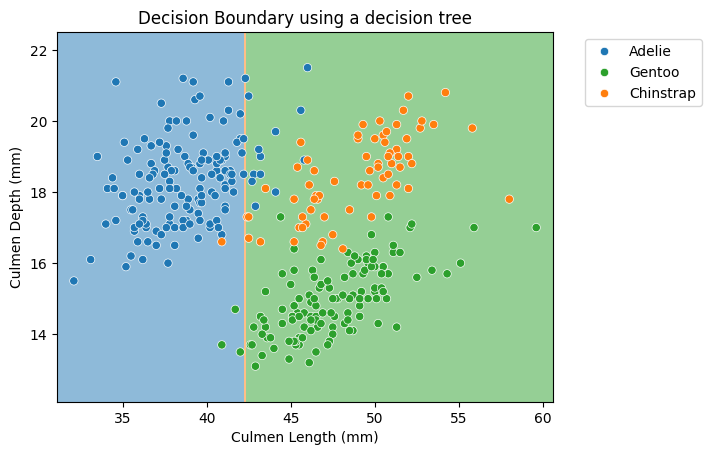

In [18]:
DecisionBoundaryDisplay.from_estimator(
    tree,
    X_train,
    response_method="predict",
    cmap="tab10",
    norm=tab10_norm,
    alpha=0.5,
)
sns.scatterplot(
    data=penguins,
    x=culmen_columns[0],
    y=culmen_columns[1],
    hue=target_column,
    palette=palette,
)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
_ = plt.title("Decision Boundary using a decision tree")

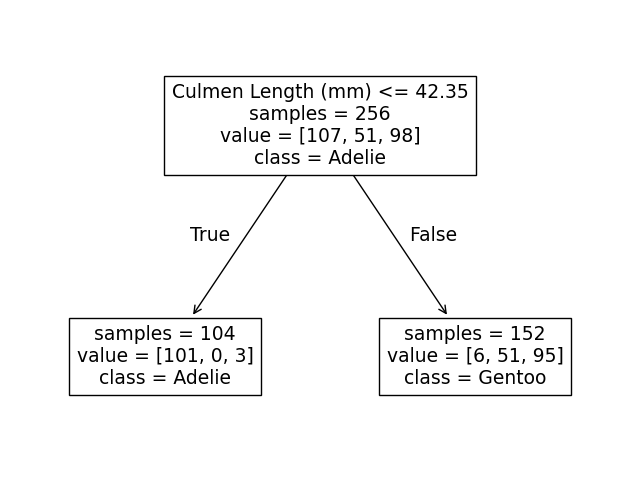

In [21]:
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(8, 6))
_ = plot_tree(
    tree,
    feature_names=culmen_columns,
    class_names = tree.classes_.tolist(),
    impurity=False,
    ax=ax
)

In [22]:
test_penguin_1 = pd.DataFrame(
    {"Culmen Length (mm)": [0], "Culmen Depth (mm)": [15]}
)
tree.predict(test_penguin_1)

array(['Adelie'], dtype=object)

In [48]:
test_penguin_2 = pd.DataFrame(
    {"Culmen Length (mm)": [35], "Culmen Depth (mm)": [8]}
)
tree.predict(test_penguin_2)

array(['Adelie'], dtype=object)

In [49]:
y_pred_proba = tree.predict_proba(test_penguin_2)
y_proba_class_0 = pd.Series(y_pred_proba[0], index=tree.classes_)

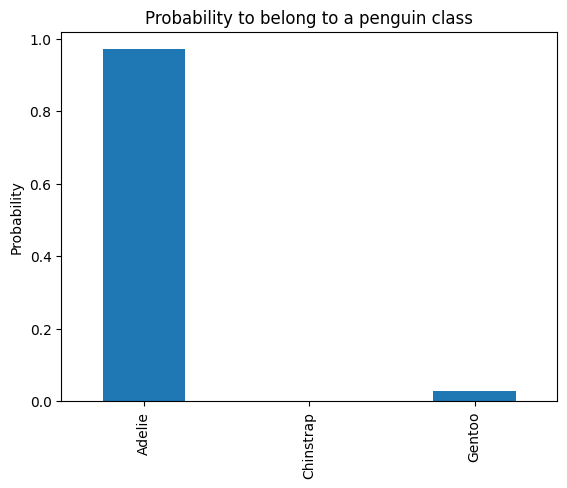

In [50]:
y_proba_class_0.plot.bar()
plt.ylabel("Probability")
_ = plt.title("Probability to belong to a penguin class")

In [51]:
tree.fit(X_train, y_train)
test_score = tree.score(X_test, y_test)
print(f"Accuracy of the DecisionTreeClassifier: {test_score:.2f}")

Accuracy of the DecisionTreeClassifier: 0.73
